## Ejercio de Tarea 01
Para los datos de la [Liga Nacional de Fútbol](https://github.com/HaydeePeruyero/MultivariateStatisticalAnalysis/blob/main/data/Liga_nacional_de_futbol.csv)

**a**. Ajustar un modelo de regresión lineal múltiple que relacione la cantidad de juegos ganados con las yardas por aire del equipo ($x_2$), el porcentaje de jugadas por tierra ($x_7$) y las yardas por tierra del contrario ($x_8$).  

**b**. Formar la tabla de análisis de varianza y probar la significancia de la regresión.  

**c**. Calcular el estadístico *t* para probar las hipótesis $H_0 : \beta_2 = 0$, $H_0 : \beta_7 = 0$ y $H_0 : \beta_8 = 0$. ¿Qué conclusiones se pueden sacar acerca del papel de las variables $x_2$, $x_7$ y $x_8$ en el modelo?  

**d**. Calcular $R^2$ y $R^2_{adj}$ para este modelo.  

**e**. Trazar una gráfica de probabilidad normal de los residuales. ¿Parece haber algún problema con la hipótesis de normalidad?  

**f**. Trazar e interpretar una gráfica de los residuales en función de la respuesta predicha.  

**g**. Trazar las gráficas de los residuales en función de cada una de las variables regresoras. ¿Implican esas gráficas que se especificó en forma correcta el regresor?  

**h**. Calcular un intervalo de confianza de $95\%$ para $\beta_7$ y un intervalo de confianza de $95\%$ para la cantidad media de juegos ganados por un equipo cuando $x_2 = 2300$, $x_7 = 56$ y $x_8 = 2100$.  

**i**. Ajustar un modelo a esos datos, usando solo $x_7$ y $x_8$ como regresores y probar la significancia de la regresión.  

**j**. Calcular $R^2$ y $R^2_{adj}$. Compararlos con los resultados del modelo anterior.  

**k**. Calcular un intervalo de confianza de $95\%$ para $\beta_7$. También, un intervalo de confianza de $95\%$ para la cantidad media de juegos ganados por un equipo cuando $x_7 = 56$ y $x_8 = 2100$. Comparar las longitudes de esos intervalos de confianza con las longitudes de los correspondientes al modelo anterior.  

**l**. ¿Qué conclusiones se pueden sacar de este problema, acerca de las consecuencias de omitir un regresor importante de un modelo?

## 0. Importar 

### 0.1. Importar Librerías

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf

from scipy import stats

import SourcePython as src

### 0.2. Cargar Datos

In [2]:
DatasetFutbol = pd.read_csv(
    './Liga_nacional_de_futbol.csv',
)

TargetLabel , *FeatureLabels = DatasetFutbol.columns

DatasetFutbol.head()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9
0,10,2113,1985,38.9,64.7,4,868,59.7,2205,1917
1,11,2003,2855,38.8,61.3,3,615,55.0,2096,1575
2,11,2957,1737,40.1,60.0,14,914,65.6,1847,2175
3,13,2285,2905,41.6,45.3,-4,957,61.4,1903,2476
4,10,2971,1666,39.2,53.8,15,836,66.1,1457,1866


## **a**. Modelo de Regresión

Por medio del plot generado, se puede apreciar que los atributos (variables de regresión) consideradas capturan una tendendecia o relación con la variable de respuesta. Por lo que se tiene un modelo, que a priori, podría generar buenas predicciones (estimaciones).

In [3]:
# Ajuste de Modelo usando Funciones de Python 

FeaturesModel = ['x2','x7','x8']

LinearModel = smf.ols(
    f"{TargetLabel} ~ " + ' + '.join(FeaturesModel),
    data = DatasetFutbol,
).fit()

In [4]:
# Ajuste de Modelo de forma Manual

EstimateBetas , DataMatrixX , RealValuesY = src.ManualLinearModel(DatasetFutbol,FeaturesModel,TargetLabel)

EstimateBetas

array([[-1.80837206],
       [ 0.00359807],
       [ 0.19396021],
       [-0.00481549]])

In [5]:
# Resumen del modelo

LinearModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     29.44
Date:                Mon, 25 Aug 2025   Prob (F-statistic):           3.27e-08
Time:                        22:29:53   Log-Likelihood:                -52.532
No. Observations:                  28   AIC:                             113.1
Df Residuals:                      24   BIC:                             118.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8084      7.901     -0.229      0.821     -18.115      14.498
x2             0.0036      0.001      5.177      0.000       0.002       0.005
x7             0.1940      0.088      2.198      0.038       0.012       0.376
x8            -0.0048      0.001     -3.771      0.001      -0.007      -0.002
==============================================================================
Omnibus:                        0.665   Durbin-Watson:                   1.492
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.578
Skew:                           0.321   Prob(JB):                        0.749
Kurtosis:                       2.712   Cond. No.                     7.42e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.42e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

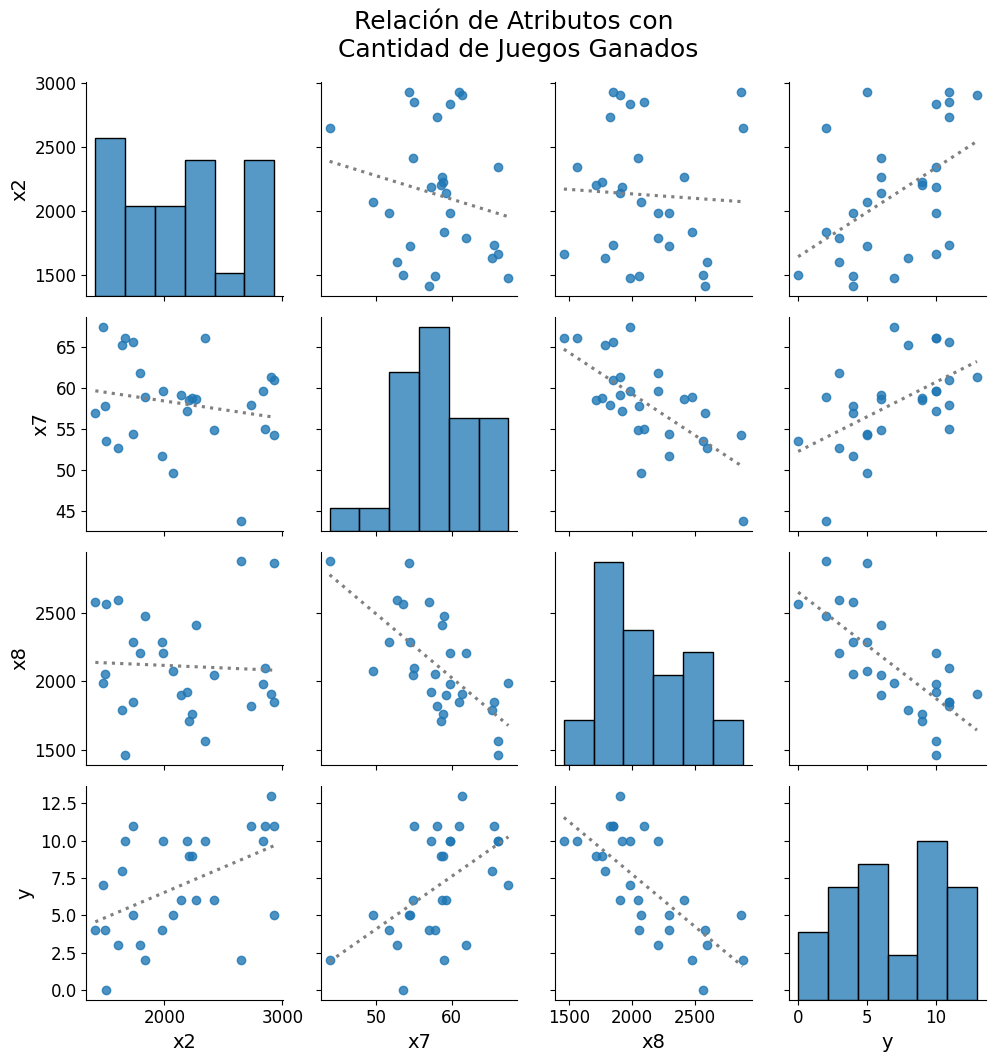

In [6]:
src.PlotScatterReg(
    DatasetFutbol,
    FeaturesModel,
    TargetLabel,
    'Cantidad de Juegos Ganados',
)

## **b**. Tabla de Análisis de Varianza

Usando los valores que se encuentran en la columna de `Cuadrados Medios`, permiten decir que el modelo se ajusta adecuadamente, debido a que el valor en los Cuadrados Medios Residuales es un valor bajo. Aplicando la prueba de significancia de la regresión, se tiene que el estadistico $F_0$ es mayor que a $F_1$ (de manera notoria) por lo que la cantidad de juegos ganados depende linealmente de por al menos un de las variables de estudio.

In [7]:
ANOVA = src.ANOVATable(
    LinearModel,
)

ANOVA

,Suma de Cuadrados,Grados de Libertad,Cuadrados Medios,F_0
Fuente Variación,,,,
Regresión,257.094282,3.0,85.698094,29.43687
Residuales,69.870004,24.0,2.911250,NaN
Total,326.964286,27.0,12.109788,NaN


In [8]:
ANOVA_Manual = src.ANOVATable_Manual(
    DataMatrixX,
    RealValuesY,
    EstimateBetas,
)

ANOVA_Manual

,Suma de Cuadrados,Grados de Libertad,Cuadrados Medios,F_0
Fuente Variación,,,,
Regresión,257.094282,3,85.698094,29.43687
Residuales,69.870004,24,2.911250,NaN
Total,326.964286,27,12.109788,NaN


In [9]:
# Calculo del valor estadístico F_1

LevelSignificance = 0.05
F_1 = stats.f.ppf(1-LevelSignificance,*ANOVA['Grados de Libertad'].iloc[:2])

print(f'F_1 :: {F_1}')

F_1 :: 3.0087865704473615


## **c**. Prueba sobre los Coeficientes Individuales de Regresión

Las tres variables tiene un valor en sus respectivos estadísticos $t_0$ mayor, en valor absoluto, a $t_1$, por lo que las tres variables tienen una influencia sobre la variable de respuesta. Aunque la variable $x_7$ tiene una menor influencia o impacto debido a que su valor se aproxima o se parece a $t_1$, por lo que esta variable no es significativa para el modelo.

In [10]:
# Calculo de valores t_0 y t_1

LevelSignificance = 0.05

src.TestIndividualCoefficients(
    LinearModel,
    DatasetFutbol,
    FeaturesModel,
    LevelSignificance,
)

t_1 :: 2.0638985616280205

t_0 Values
x2 :: 5.177090239985967
x7 :: 2.198261682781837
x8 :: -3.7710364517268267


## **d**. Métricas del Modelo

Las métricas del modelo son bajas, esto representa que no se está modelando adecuadamente la variable de respuesta pero que a la vez se tiene oportunidad de mejorar (añadir interacciones o eliminar la variable de intercepción). Al observar el plot, se puede ver que existen observaciones que no se ajustan al modelo propuesto, teniendo que empeore el rendimiento del propio modelo aunque en algunas instancias tenga un comportamiento esperado y bien ajustado.

In [11]:
# Scores usando el Modelo

print(f'R^2 :: {LinearModel.rsquared}')
print(f'R^2 Adjustada:: {LinearModel.rsquared_adj}')

R^2 :: 0.7863069233109538
R^2 Adjustada:: 0.759595288724823


In [12]:
# Scores usando Operaciones Manuales

RSquared = src.ManualRSquared(ANOVA_Manual)
RSquared_Adj = src.ManualAdjRSquared(ANOVA_Manual)

print(f'R^2 :: {RSquared}')
print(f'R^2 Adjustada:: {RSquared_Adj}')

R^2 :: 0.7863069233107012
R^2 Adjustada:: 0.7595952887245389


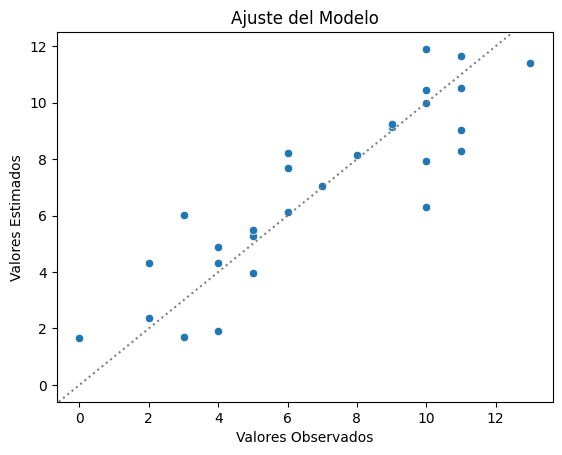

In [13]:
# Plot de los valores esperados (observados) y estimados

_ = src.PlotExpectedEstimate(LinearModel,DatasetFutbol[TargetLabel])

## **e**. Gráfica de Probabilidad Normal de los Residuales

Se tiene que la parte central del Q-Q plot tiene una ligera forma de S, esto implica que existe un ligero sesgo en los residuales centrales, pero las colas no son pesadas (se alinean a la recta identidad), por lo que los residuales podrían seguir una distribución normal con media $0$. Dicho así, no se viola el supuesto de normalidad.

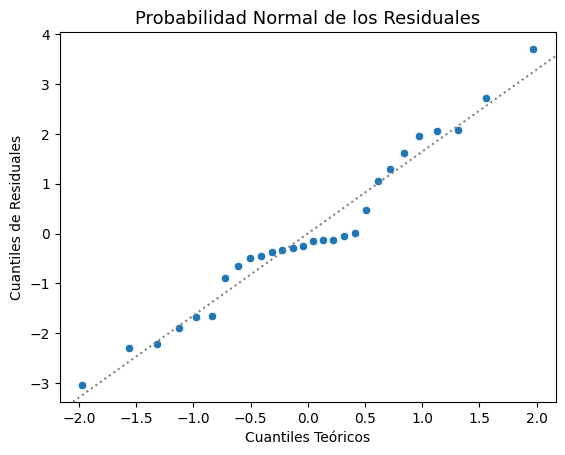

In [14]:
# Plot

_ = src.PlotQQResiduals(LinearModel)

## **f**. Gráfica de los Residuales en Función de la Respuesta Predicha

Como en el plot presentado no figura algún patrón o curva, podría ser indicio de que los residuales representan la parte aleatoria o ruido propio de cada instancia (observación). Por lo tanto, se tiene una homocedasticidad en los residuales del modelo y en los propios datos.

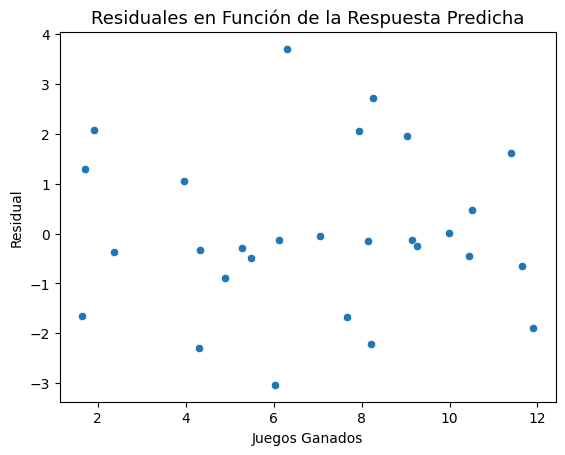

In [15]:
# Plot

_ = src.PlotPredictResiduals(LinearModel,'Juegos Ganados')

## **g**. Gráficas de los Residuales en Función de las Variables Regresoras

En las variables $x_2$ y $x_8$ no parece que tengan algún patrón o curva, esto podría ser indicio de que se cumplen los supuestos de homocedasticidad y de una buena especificación en el modelo. En cambio, en la variable $x_7$ se nota que los puntos siguen un patrón de cono, esto podría estar relacionado con que ay heterocedasticidad en esta variable, violando así el principio de especificación en el modelo.

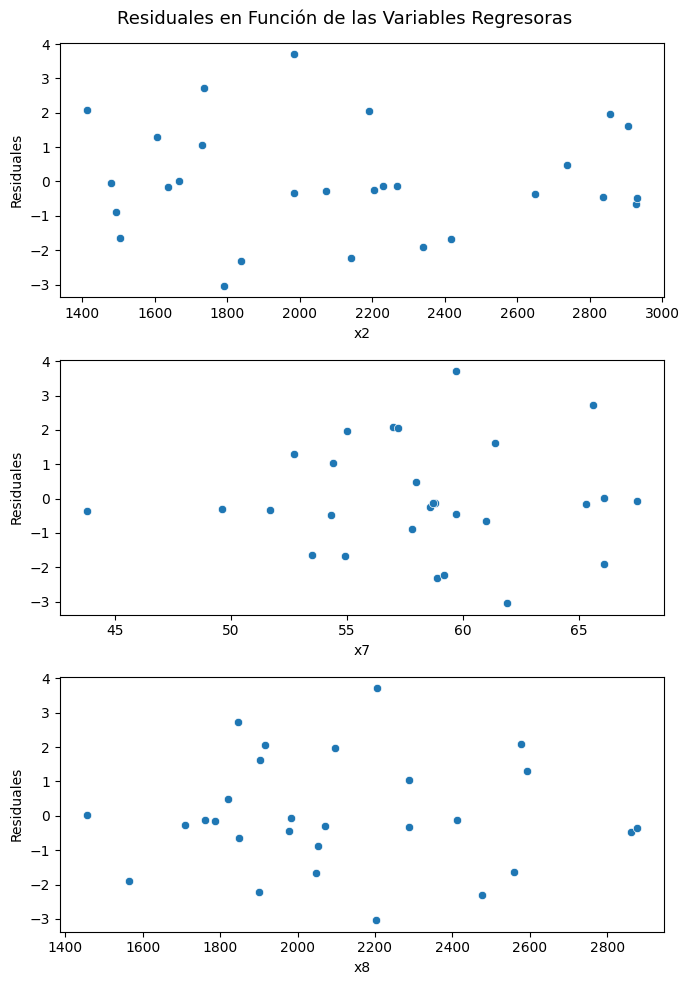

In [16]:
# Plot

_ = src.PlotVariableResiduals(
    LinearModel,
    DatasetFutbol,
    FeaturesModel,
)

## **h**. Intervalos de Confianza

### 1. Coeficiente de Regresión $\beta_7$

La longitud del intervalo de confianza para $\beta_7$ es amplio en comparación con el generado para los otros dos coeficientes, esto representa que se tiene una mayor incertidumbre sobre el valor de este coeficiente.

In [17]:
# Intervalos de Confianza para Coeficientes

src.ConfidenceIntervalsCoefficient(
    LinearModel,
    DatasetFutbol,
    FeaturesModel,
    [0,1,2],
)

x2 , -1.808372058704668 :: [-1.8098064652139283 , -1.806937652195408] , Longitud 0.0028688130185203775
x7 , 0.003598070213976692 :: [-0.17850681780157873 , 0.1857029582295321] , Longitud 0.3642097760311108
x8 , 0.19396020958321789 :: [0.1913246765658257 , 0.19659574260061008] , Longitud 0.0052710660347843885


### 2. Respuesta Media

El intervalo de confianza es de un tamaño relativa grande, por lo que se tiene que la respuesta no es concisa. Pero al comparar cómo son los intervalos de confianza para instancias cuya cantidad de juegos ganados son 6, 7 u 8 se generan intervalos de confianza de este tamaño o mayores, por lo que el modelo podría estar generando predicciones no tan robustas o precisas.

In [18]:
# Intervalo de confianza para la Respuesta Media

Observations = pd.DataFrame(
    [
        [2300,56,2100]
    ],
    columns = FeaturesModel,
)

src.ConfidenceIntervalsMeanResponse(
    LinearModel,
    DatasetFutbol,
    FeaturesModel,
    Observations,
)

[0] :: 6.43620277665725 <= 7.216423832995973 <= 7.996644889334696 , Longitud 1.5604421126774461


In [19]:
src.ConfidenceIntervalsMeanResponse(
    LinearModel,
    DatasetFutbol,
    FeaturesModel,
    DatasetFutbol.query(f'{TargetLabel} in [6,7,8]')
)

[0] :: 5.42396531271377 <= 7.055145968267942 <= 8.686326623822113 , Longitud 3.262361311108343
[1] :: 7.425049128172527 <= 8.219688569466038 <= 9.01432801075955 , Longitud 1.5892788825870232
[2] :: 4.974294566824996 <= 6.127359527337713 <= 7.28042448785043 , Longitud 2.306129921025434
[3] :: 6.701774204605457 <= 7.670849433718352 <= 8.639924662831246 , Longitud 1.9381504582257891
[4] :: 6.921714728758598 <= 8.15039640706317 <= 9.379078085367741 , Longitud 2.457363356609143


## **i**. Modelo de Regresión Alternativo

Al momento de aplicar la prueba sobre la significancia de la regresión, sí es significativa pero igual no se obtuvo un estadístico $F_0$ notoriamente mayor que $F_1$, e incluso los cuadrados medios empeoraron respecto al anterior modelo. Por lo tanto, se tiene un modelo peor al construido anteriormente.

In [20]:
# Ajuste de Modelo Alternativo usando Funciones de Python 

FeaturesModel_Alt = ['x7','x8']

LinearModel_Alt = smf.ols(
    f"{TargetLabel} ~ " + ' + '.join(FeaturesModel_Alt),
    data = DatasetFutbol,
).fit()

In [21]:
# Ajuste de Modelo Alternativo de forma Manual

EstimateBetas_Alt , DataMatrixX_Alt , _ = src.ManualLinearModel(DatasetFutbol,FeaturesModel_Alt,TargetLabel)

In [22]:
# Tabla de ANOVA con el nuevo modelo

print(f'F_1 :: {F_1}')

ANOVA_Alt = src.ANOVATable(LinearModel_Alt)
ANOVA_Alt

F_1 :: 3.0087865704473615


,Suma de Cuadrados,Grados de Libertad,Cuadrados Medios,F_0
Fuente Variación,,,,
Regresión,179.066188,2.0,89.533094,15.134254
Residuales,147.898098,25.0,5.915924,NaN
Total,326.964286,27.0,12.109788,NaN


## **j**. Métricas del Modelo Alternativo

Como se mencionó en la sección anterior, [i. Modelo de Regresión Alternativo](#i-modelo-de-regresión-alternativo), este modelo tiene un peor comportamiento para predecir respecto al anterior, y esto se muestra al considerar las métricas que tiene las cuales decayeron en $0.2$ puntos. Junto con que las predicciones generadas por este nuevo modelo se encuentran más dispersas respecto a los valores reales, no se alinean a la identidad, lo anterior equivale a que va a construir intervalos de confianza más largos.

In [23]:
# Scores usando el Modelo

print(f'R^2 :: {LinearModel_Alt.rsquared}')
print(f'R^2 Adjustada:: {LinearModel_Alt.rsquared_adj}')

R^2 :: 0.5476628350557938
R^2 Adjustada:: 0.5114758618602573


In [24]:
# Scores usando Operaciones Manuales

RSquared = src.ManualRSquared(ANOVA_Alt)
RSquared_Adj = src.ManualAdjRSquared(ANOVA_Alt)

print(f'R^2 :: {RSquared}')
print(f'R^2 Adjustada:: {RSquared_Adj}')

R^2 :: 0.5476628350557938
R^2 Adjustada:: 0.5114758618602573


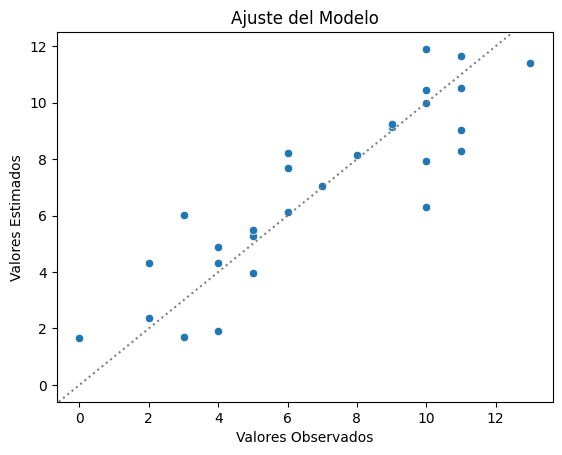

In [25]:
_ = src.PlotExpectedEstimate(
    LinearModel,
    DatasetFutbol[TargetLabel],
)

## **k**. Intervalos de Confianza en el Modelo Alternativo

### 1. Coeficiente de Regresión $\beta_7$

Se generó un intervalo de una mayor longitud, esto se relaciona con que existe una mayor incertidumbre sobre el valor real de $\beta_7$ y sobre su importancia para predecir la variable de respuesta. Todo esto provoca que se incremente la longitud del intervalo y pierda robustez en este nuevo modelo.

In [26]:
# Intervalos de Confianza para Coeficientes

src.ConfidenceIntervalsCoefficient(
    LinearModel_Alt,
    DatasetFutbol,
    FeaturesModel_Alt,
    [0,1],
)

x7 , 17.94431852007709 :: [17.69878336645282 , 18.18985367370136] , Longitud 0.49107030724854184
x8 , 0.048370868566080416 :: [0.044751093679394 , 0.051990643452766834] , Longitud 0.007239549773372836


### 2. Respuesta Media

Debido al deterioro de este nuevo modelo, los intervalos de confianza incrementaron, haciendo que la respuesta media de las predicciones tengan intervalos de confianza con tamaños más grandes; como lo que pasó en este caso, el cual se hizo $0.6$ más grande, es decir, una mayor incertidumbre sobre la predicción.

In [27]:
src.ConfidenceIntervalsMeanResponse(
    LinearModel_Alt,
    DatasetFutbol,
    FeaturesModel_Alt,
    Observations,
)

[0] :: 5.8286434997258 <= 6.92624256625235 <= 8.0238416327789 , Longitud 2.1951981330531005


## **l**. Conclusiones

La selección adecuada y oportuna de las variables de regresión en un modelo lineal determinan totalmente la calidad del modelo que se está construyendo. Por ello, el analizar las relaciones lineales entre las variables candidatas respecto a la variable de respuesta puede permitir cuáles son relevantes a incluir en el propio modelo o cuáles descartar a priori. Para este caso, el omitir la variable $x_2$ hizo que se perdiera información para predecir de mejor manera la cantidad de juegos ganados, y esto impacta de última manera en las métricas obtenidas.